# Most popular drug

In [14]:
import pandas as pd

project_id = "the-d-team-164512"

query = """\
SELECT
  GROUP_CONCAT(UNIQUE(STRING(t.Drug_ID)), ',') AS drug_ids
  , FIRST(d.MasterProductFullName) AS first_drug_name
  , d.BrandName
  , count(*) AS transaction_count
FROM [the-d-team-164512:dthon.transactions] t
JOIN [the-d-team-164512:dthon.drug_lookup] d
ON t.Drug_ID = d.MasterProductID
GROUP BY
  d.BrandName
ORDER BY transaction_count DESC
LIMIT 10
"""

df = pd.read_gbq(query, project_id)
df

Waiting for job to complete...


,drug_ids,first_drug_name,d_BrandName,transaction_count
0,"2120,2119,2117,2118",CRESTOR TAB 5MG 30,CRESTOR,1827302
1,6470,PANADOL OSTEO SR-TAB 665MG 96,PANADOL OSTEO,1693547
2,"4869,4867,4860,4861",LIPITOR TAB 80MG 30,LIPITOR,1635951
3,"5884,5887,5883",NEXIUM EC-TABS 20MG 30,NEXIUM,1539498
4,"2105,2104,2106,2103",COVERSYL TAB 2MG 30,COVERSYL,1071237
5,"5372,5373",MICARDIS TAB 40MG 28,MICARDIS,830642
6,8208,SPIRIVA INH-CAP 18MCG 30,SPIRIVA,771540
7,"6031,6032",NOTEN TAB 50MG 30 BLISTER,NOTEN,753504
8,"767,765,763,764",ATACAND TAB 4MG 30,ATACAND,732852
9,"8168,8157,8156,8166,8165",SOMAC EC-TABS 20MG 30 BLISTER,SOMAC,687873


## Most popular drug by time

In [17]:
# TODO replace in below
pop_drug_ids = ",".join(df['drug_ids'])

query = """\
SELECT
  d.BrandName
  , YEAR(DATE(Prescription_Week)) AS year
  , COUNT(*) AS transaction_count
FROM [the-d-team-164512:dthon.transactions] t
JOIN [the-d-team-164512:dthon.drug_lookup] d
ON t.Drug_ID = d.MasterProductID
WHERE t.Drug_ID IN (2120,2119,2117,2118,6470,4869,4867,4860,4861,5884,5887,5883,2105,2104,2106,2103,5372,5373,8208,6031,6032,767,765,763,764,8168,8157,8156,8166,8165)
GROUP BY
  d.BrandName
  , year
ORDER BY
  d.BrandName
  , year ASC
"""

df_pop_by_year = pd.read_gbq(query, project_id)

Waiting for job to complete...


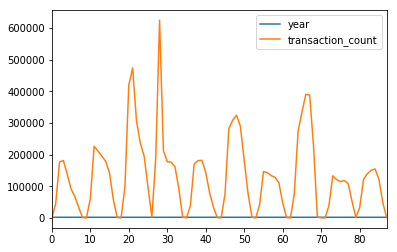

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# TODO fix this to plot over years by drug group
df_pop_by_year.plot()